In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Path to your dataset folder
dataset_path = '/content/drive/MyDrive/fruits-360'

# Check the contents of the dataset folder
os.listdir(dataset_path)

['LICENSE', 'readme.md', 'Training', 'papers', 'Test', 'test-multiple_fruits']

In [5]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
def getYourFruits(fruits, data_type):
    data = []
    labels = []

    for fruit in fruits:
        folder_path = os.path.join('/content/drive/MyDrive/fruits-360', data_type, fruit)
        label = fruits.index(fruit)

        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
                data.append(image)
                labels.append(label)

    return np.array(data), np.array(labels)

def plot_image_grid(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()

def plotPrincipalComponents(dataIn2D, components):
    plt.scatter(dataIn2D[:, 0], dataIn2D[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
    plt.title(f'Principal Components ({components}D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def computePCA(components, data, image_id):
    pca = PCA(n_components=components)
    dataIn2D = pca.fit_transform(data)
    return dataIn2D[image_id]

def showPCA(original_image, pca_2, pca_10, pca_50):
    plt.figure(figsize=(10, 3))

    plt.subplot(131)
    plt.imshow(original_image)
    plt.title('Original Image')

    plt.subplot(132)
    plt.imshow(pca_2, cmap='gray')
    plt.title('PCA (2 Components)')

    plt.subplot(133)
    plt.imshow(pca_10, cmap='gray')
    plt.title('PCA (10 Components)')

    plt.show()

In [8]:
# List of fruits
fruits = ['Banana', 'Cocos', 'Mango', 'Peach', 'Pineapple']

# Get Images and Labels
X_train, y_train = getYourFruits(fruits, 'Training')
X_test, y_test = getYourFruits(fruits, 'Test')

# Scale Data Images
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform([i.flatten() for i in X_train])
X_test_scaled = scaler.fit_transform([i.flatten() for i in X_test])

In [11]:
print(y_train)

[0 0 0 ... 4 4 4]


Cocos


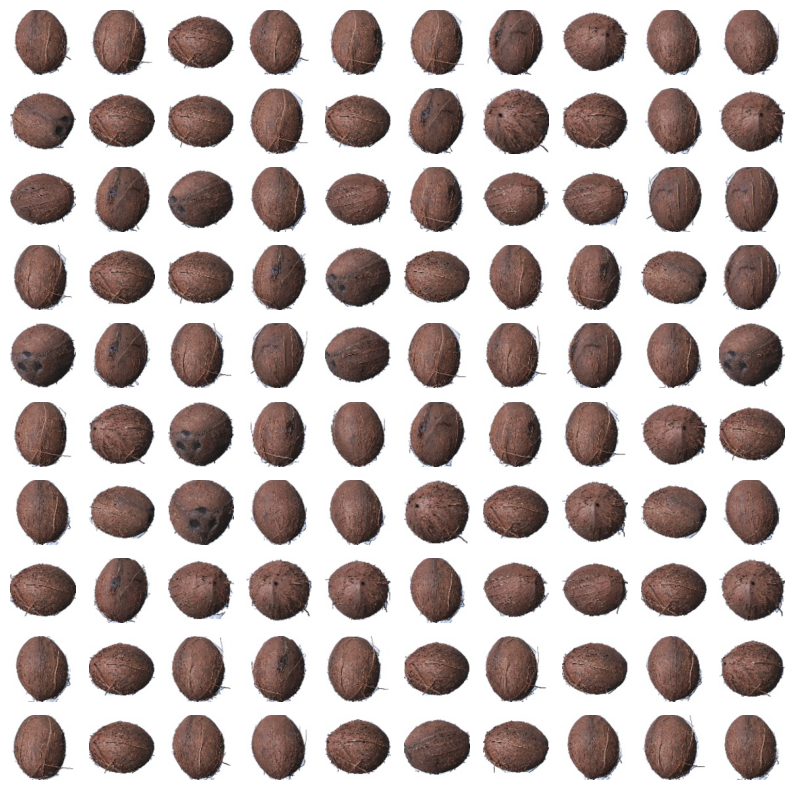

In [12]:
# Plot images
print(fruits[y_train[490]])
plot_image_grid(X_train[490:590], 10, 10)


Pineapple


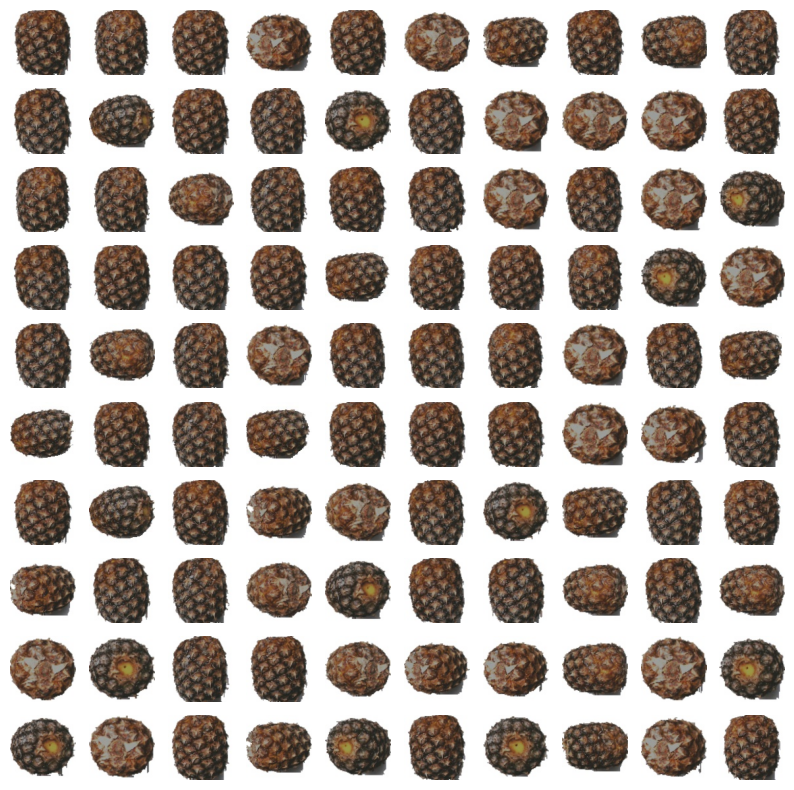

In [14]:
print(fruits[y_train[1962]])
plot_image_grid(X_train[1962:2062], 10, 10)

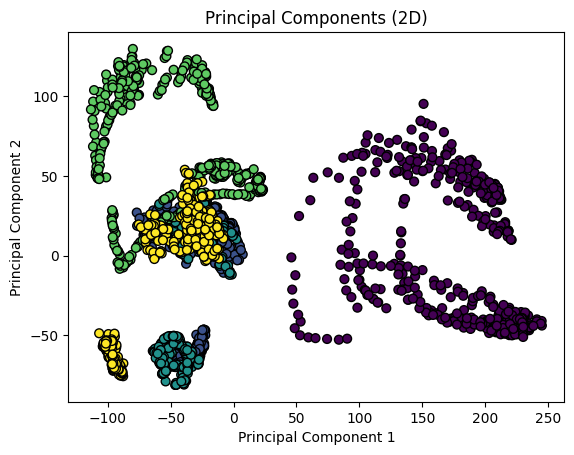

In [15]:
# PCA
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train_scaled)
plotPrincipalComponents(dataIn2D, 2)

As we can see, if we reduce the dimensionality of the data to to just 2 dimensions, there are no distinct boundaries being made between the 5 classes. As a result, we must find the right balance between the appropriate amount of PCA, and inference time.

In [22]:
# SVM model
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))

# # Confusion Matrix
# cm, _ = plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=fruits, normalize='true')
# plt.show()

# # ROC Curve
# probs = model.decision_function(X_test_scaled)
# svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
# svm_auc = metrics.roc_auc_score(y_test, probs)


Accuracy with SVM: 99.03%


In [23]:
import pickle
with open('fruits_classification_model.pkl', 'wb') as file:
    pickle.dump(model, file)